## Desciption

Here, we are training a model to predict just the direction of transcription, where forward = 1 and reverse = 0. This model uses the same architecture as CNN_5_0, but uses augmented data that includes reversed complements.

The model is used in combination with a TX-predicting model to determine if a 

In [1]:
import IsForward_1_1 as parent

In [2]:
name = 'IsForward_1_1'

In [3]:
file_path = '../Data/Augmented/reverse_LaFleur_supp.csv'

df = parent.load_and_preprocess_data(file_path)

In [4]:
len(df)

97527

In [5]:
# Displays only the first and last row
df.iloc[[0, -1]]

,File Name,Upstream DNA,Promoter Sequence,Downstream DNA,Observed log(TX/Txref),Reversed,Augmented Observed log(TX/Txref),Forward
0,La Fleur et al (Fig 3a).csv,CTCGGTACCAAATTCCAGAA,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,GAATTCGATCAAATTTCGAG,-3.386326,False,-3.386326,1
97526,De Novo Designs (Fig 5 b and c).csv,ATGGAACCTCGAAATTTGATCTTAAACAAAATTATTTGTAGAGGCT...,GAATTCTATTATAATATGCATAATAATAAATGTGTGATTATATTGT...,TGTTGGACCAAAACGAAAAAAGACGCTCGAAAGCGTCTCTTT,-6.734191,True,6.734191,0


In [6]:
df['File Name'].unique()

array(['La Fleur et al (Fig 3a).csv', 'Urtecho et al (Fig 3c, S7b).csv',
       'Hossain et al (Fig 3d, S7d).csv', 'Yu et al (Fig S3).csv',
       'Lagator 36N.csv', 'Lagator Pl.csv', 'Lagator Pr.csv',
       'Anderson Series (Fig 4c).csv',
       'De Novo Designs (Fig 5 b and c).csv'], dtype=object)

In [7]:
X, y = parent.combine_columns(df)
X = parent.preprocess_sequences(X)

In [8]:
X.shape

(97527, 150, 4)

In [9]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9859 - loss: 0.0342 - val_accuracy: 0.9996 - val_loss: 0.0012
Epoch 2/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9997 - loss: 6.5831e-04 - val_accuracy: 0.9996 - val_loss: 0.0011
Epoch 3/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9998 - loss: 6.0225e-04 - val_accuracy: 0.9995 - val_loss: 0.0017
Epoch 4/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9998 - loss: 5.5624e-04 - val_accuracy: 0.9999 - val_loss: 2.6267e-04
Epoch 5/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9997 - loss: 8.1845e-04 - val_accuracy: 0.9999 - val_loss: 2.4277e-04
Epoch 6/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 1.0000 - loss: 1.6169e-04 - val_accuracy: 0.9998 - val_loss: 5.6998e-04
Epoch 7/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 1.0000 - loss: 2.8916e-05 - val_accuracy: 0.9998 - val_loss: 6.1007e-04
Epoch 8/150
2439/2439 ━━━━━━━━━━━━━━

610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


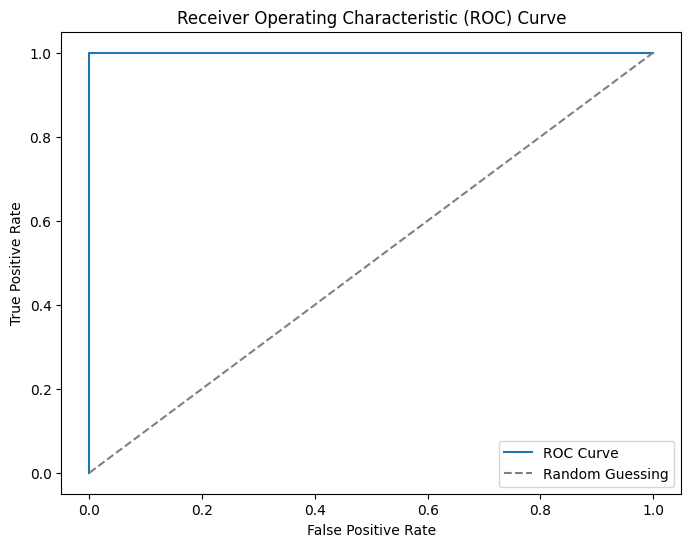

In [11]:
predicted = parent.load_and_predict(name, X_test)
observed = y_test

parent.plot_roc_curve(observed, parent.ravel(predicted))

In [23]:
X_test.shape, y_test.shape

((19506, 150, 4), (19506,))

In [24]:
X_test2.shape, y_test2.shape

((26961, 87, 4), (26961,))

3048/3048 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


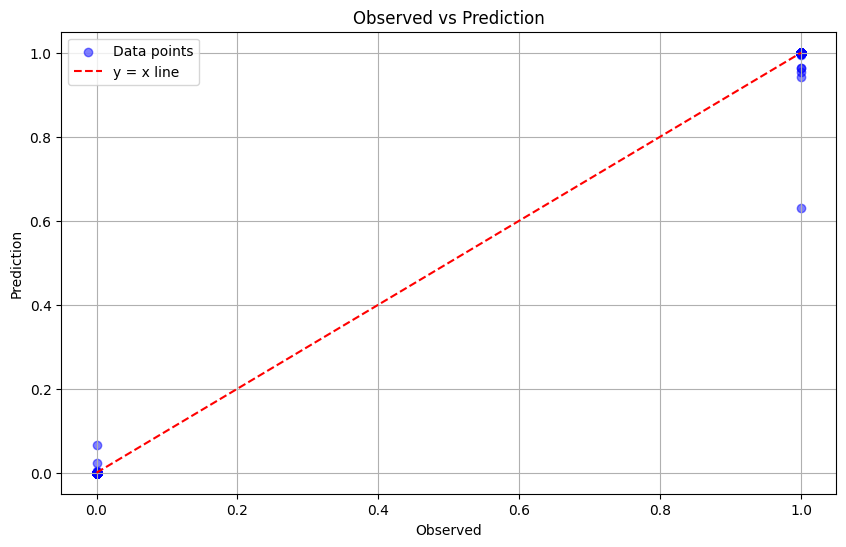

In [12]:
predicted = parent.load_and_predict(name, X)
observed = df['Reversed'].apply(lambda x: 0 if x == True else 1).values

parent.plot_scatter(observed, parent.ravel(predicted))

In [17]:
for metric, value in loss.items():
    print(f"{metric}: {value}")

accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0
auc: 1.0


843/843 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


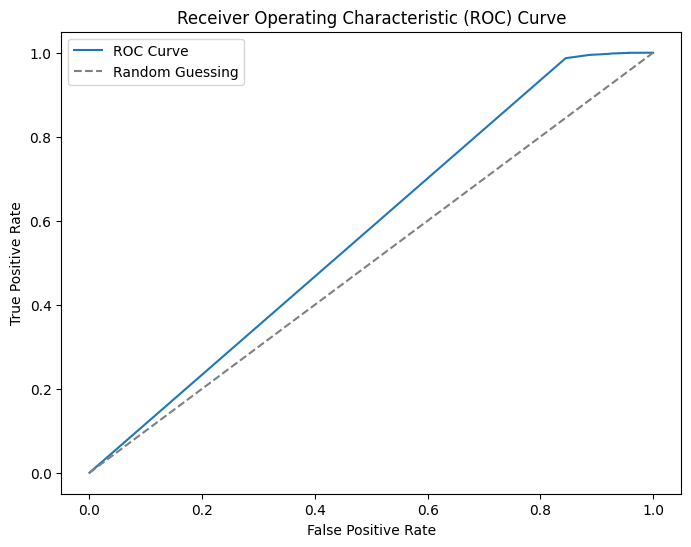

In [12]:
# additional testing using the reverse_LaFleur_h10_h35.csv

df = parent.load_and_preprocess_data('../Data/Augmented/reverse_LaFleur_h10_h35.csv')
X_test2, y_test2 = parent.combine_columns(df)
X_test2 = parent.preprocess_sequences(X_test2)

predicted2 = parent.load_and_predict(name, X_test2)
parent.plot_roc_curve(y_test2, parent.ravel(predicted2))

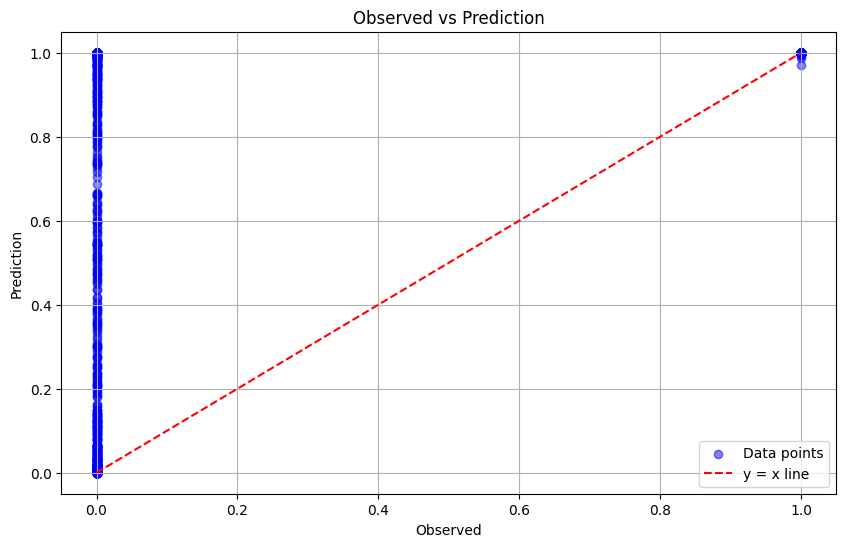

In [13]:
parent.plot_scatter(y_test2, parent.ravel(predicted2))

In [9]:
from keras.models import Sequential, load_model

model = load_model('../Models/' + name + '.keras')

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 147, 64)        │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 73, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 70, 64)         │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 35, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2240)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       143,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 483,077 (1.84 MB)

 Trainable params: 161,025 (629.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322,052 (1.23 MB)